In [1]:
import pandas as pd
import os
from fastai.vision.all import *

C:\Users\bowan\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
Dataframe_path = '../image_data_assorted.csv'

if os.path.exists(Dataframe_path):
    print("The file exists.")
else:
    %run ../Generating_basic_data.ipynb

The file exists.


In [2]:

df = pd.read_csv(Dataframe_path)

In [3]:
df.head()

,Radius,X_Position,Y_Position,Area,Surface2d,Volume,image_path,mask_path,shape
0,26,216,360,2123,82,73585,../images_assorted/image_1.png,../masks_assorted/mask_1.png,circle
1,56,285,248,3136,224,175616,../images_assorted/image_2.png,../masks_assorted/mask_2.png,square
2,16,69,205,256,64,4096,../images_assorted/image_3.png,../masks_assorted/mask_3.png,square
3,105,336,270,34618,330,4846590,../images_assorted/image_4.png,../masks_assorted/mask_4.png,circle
4,99,182,295,4900,338,970299,../images_assorted/image_5.png,../masks_assorted/mask_5.png,triange


In [4]:
def get_inputs(row):
    # Convert image path to PILImage
    image_path = row['image_path']
    image_data = PILImage.create(image_path)
    return image_data 

def get_target(row):
    # Convert image path to PILImage
    target_data = row['shape']
    return target_data

In [9]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  # Image input and auxiliary input
    get_x=get_inputs,  # Get both the image path and the auxiliary input
    get_y=get_target  # Get the radius value from the dataframe
    #splitter=RandomSplitter(valid_pct=0.2, seed=42),  # Split into train and validation sets
    #item_tfms=Resize(512)  # Resize images to 512x512

)


In [17]:
#os.chdir('..') # just moves directory where shared dataset is
dls = dblock.dataloaders(df, bs=64)


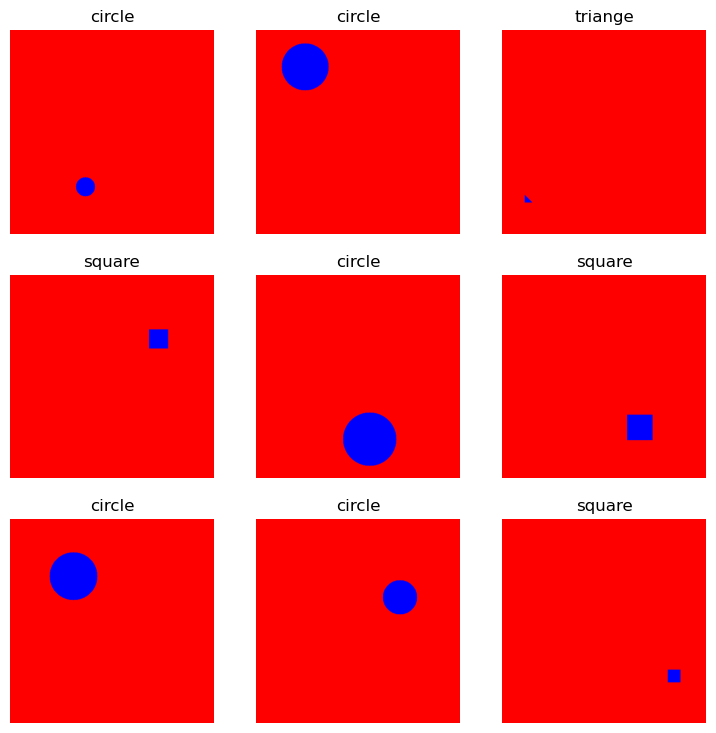

In [18]:
dls.show_batch()

In [8]:
# Create and train the learner
learn = vision_learner(dls, resnet34, metrics=accuracy)


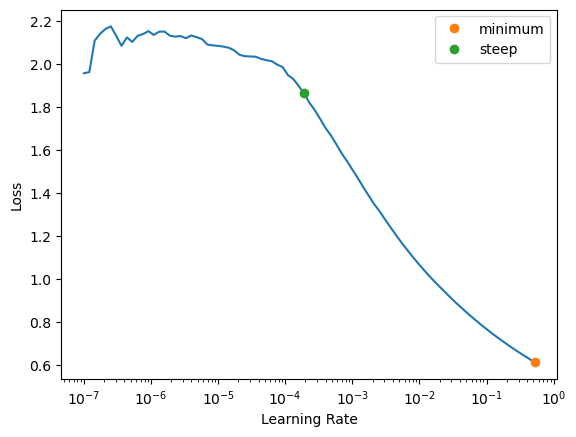

In [9]:
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [10]:
learn.fine_tune(10, base_lr=lr_steep)

epoch,train_loss,valid_loss,accuracy,time
0,1.781769,2.471849,0.320000,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.908959,1.399032,0.450000,00:08
1,0.679661,2.224085,0.525000,00:07
2,0.469081,0.951497,0.675000,00:07
3,0.336014,0.091687,0.975000,00:07
4,0.242232,0.020538,0.995000,00:07
5,0.183902,0.012868,0.995000,00:07
6,0.143795,0.010638,0.995000,00:07
7,0.114098,0.009331,0.995000,00:07
8,0.090668,0.008653,0.995000,00:07
9,0.074071,0.008836,0.995000,00:07


<bound method Recorder.plot_loss of Recorder>


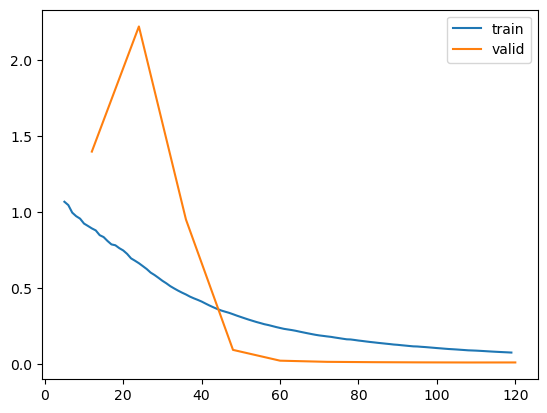

In [11]:
# Plot the losses
learn.recorder.plot_loss()
print(learn.recorder.plot_loss)
# Set the y-axis limits (replace with your desired limits)
#plt.ylim(0, 5)  # sets y-axis limits 
# Show the plot with updated y-limits
plt.show()

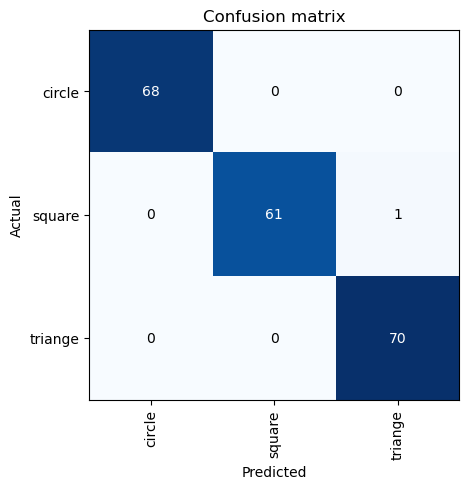

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [13]:


learn.export('exported_classification_model.pkl')
 


In [19]:
# import

learn2 = load_learner('exported_classification_model.pkl')   # using learner2 to show its loading

In [24]:
# just getting a random image from df
image_paths = df['image_path']
image_data = PILImage.create(image_paths[4])
Prediction, ClassID, Confidence =learn2.predict(image_data)

In [26]:
print(Prediction)
print(ClassID)
print(Confidence)

triange
tensor(2)
tensor([1.3473e-04, 5.6745e-04, 9.9930e-01])


<Axes: >

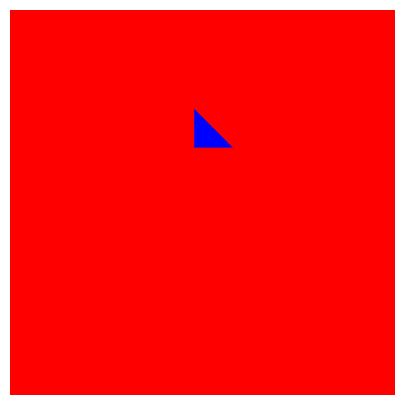

In [16]:
image_data.show()